In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("results.csv", index_col=0)

In [27]:
df = df.assign(k=df["k"].replace({0: 1, 1: 2, 2: 3, 4: 5, 5: 10}))

In [28]:
# we don't have all results for k=4
df = df[df["k"] != 5]

In [29]:
df.drop(columns=["ckpt", "i"]).groupby(["k"]).agg(["mean", "std"])

test_loss            test_acc           test_recall            \
       mean       std      mean       std        mean       std   
k                                                                 
1  0.850448  0.098573  0.691346  0.099571    0.691346  0.099571   
2  0.933580  0.103562  0.599952  0.111934    0.599952  0.111934   
3  0.880226  0.097947  0.651330  0.115152    0.651330  0.115152   

  test_precision             test_f1            
            mean       std      mean       std  
k                                               
1       0.633095  0.155071  0.691346  0.099571  
2       0.563989  0.139495  0.599952  0.111934  
3       0.650226  0.117439  0.651330  0.115152

We can compare all results with results from paper (`k` is multiplied by 10 in DeepLOB due to sampling in original dataset).
We can see, that results reproduced based on author's code and exact evaluation described in Benchmark article are not similar.
Based on author's code, one can suggest, they only checked this approach "globally", while authors suggest to prepare experiments in time-folded manner.
Results are still better than original benchmarks, but aren't that competitive, especially regarding large standard deviation of metrics.

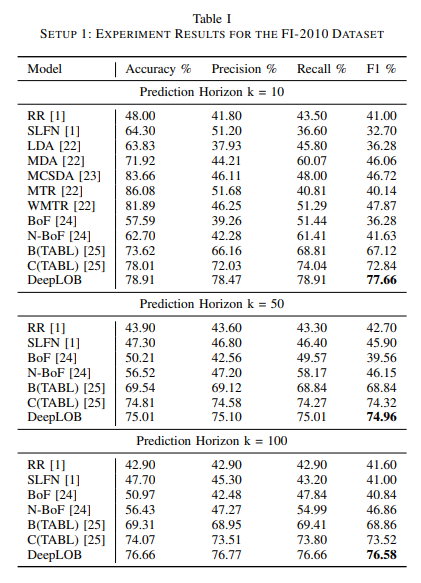